In [92]:
# OS and filesystem
import os
import sys
from pathlib import Path

# Console output
from colorama import Fore, Style
from tqdm.notebook import tqdm

import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Filesystem paths
PARENT_FOLDER = Path.cwd()
DATA_FOLDER = (PARENT_FOLDER / ".." / ".." / "data").resolve()

In [118]:
data_anime = pd.read_csv(DATA_FOLDER / "anime.csv")
data_anime.head(n=5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [119]:
data_ratings = pd.read_csv(DATA_FOLDER / "rating.csv")
data_ratings


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [35]:
#Nombre d'animés
data_anime['anime_id'].nunique()

12294

In [14]:
#Nombre d'utilisateurs
data_ratings['user_id'].nunique()

73515

In [18]:
def duplicated_values(data_anime):
    data_count = data_anime.shape[0] * data_anime.shape[1]
    duplicated = data_anime.duplicated().sum()

    print(f"{Style.BRIGHT}Duplicated values:{Style.RESET_ALL} {duplicated} ({round((duplicated.sum() / data_count) * 100, 2)}%)")


duplicated_values(data_anime=data_ratings)

Duplicated values: 1 (0.0%)


In [61]:
data_ratings = data_ratings[~data_ratings.duplicated()]
data_ratings

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [88]:
# Matrice des notes
# créer la matrice des notes en utilisant la fonction pivot_table
ratings_matrix = data_ratings.pivot_table(index='user_id', columns='anime_id', values='rating', fill_value=0)

# afficher la matrice des notes
print(ratings_matrix)

MemoryError: Unable to allocate 5.15 GiB for an array with shape (69600, 9927) and data type float64

In [89]:
#Proportion de notes manquantes
# calculer la proportion de notes manquantes
prop_missing = ratings_matrix.isna().sum().sum() / (ratings_matrix.shape[0] * ratings_matrix.shape[1])
print(f'Proportion de notes manquantes : {prop_missing:.2%}')

Proportion de notes manquantes : 0.00%


In [54]:
#Affichage des 10 animés les mieux notés en utilisant la note moyenne pour chaque animé de MyAnimeList

# Trier les données par note décroissante
sorted_anime = data_anime.sort_values(by='rating', ascending=False)

# Afficher les 10 premiers animés avec leur nom et leur note moyenne
top_10_anime = sorted_anime.head(10)[['name', 'rating']]

print(top_10_anime)


                                          name  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00
10400              Spoon-hime no Swing Kitchen    9.60
9595                          Mogura no Motoro    9.50
0                               Kimi no Na wa.    9.37
9078                              Kahei no Umi    9.33
1             Fullmetal Alchemist: Brotherhood    9.26
2                                     Gintama°    9.25
10786          Yakusoku: Africa Mizu to Midori    9.25
3                                  Steins;Gate    9.17
4                                Gintama&#039;    9.16


In [84]:
#Affichage des 10 animés les mieux notés en utilisant les notes individuelles de chaque animé

# Supprimer les entrées ayant une note de -1 (qui correspond à une note non renseignée)
data_ratings = data_ratings[data_ratings.rating != -1]

# Calculer la moyenne des notes pour chaque anime
anime_ratings = data_ratings.groupby('anime_id')['rating'].mean()

# Joindre les moyennes de notes avec le DataFrame des animés
data_anime = data_anime.join(anime_ratings, on='anime_id', rsuffix='_ratings')

# Trier le DataFrame par ordre décroissant des notes et sélectionner les 10 animés les mieux notés
top_10 = data_anime.sort_values(by=['rating'], ascending=False).head(10)

# Afficher les noms et notes des 10 animés les mieux notés
print(top_10[['name', 'rating']])

                                          name  rating
10464  Taka no Tsume 8: Yoshida-kun no X-Files   10.00
10400              Spoon-hime no Swing Kitchen    9.60
9595                          Mogura no Motoro    9.50
0                               Kimi no Na wa.    9.37
9078                              Kahei no Umi    9.33
1             Fullmetal Alchemist: Brotherhood    9.26
2                                     Gintama°    9.25
10786          Yakusoku: Africa Mizu to Midori    9.25
3                                  Steins;Gate    9.17
4                                Gintama&#039;    9.16


In [90]:
#Analyse de la variables "rating"
# Afficher les statistiques descriptives de la variable "rating"
print(data_anime["rating"].describe())

count    12064.000000
mean         6.473902
std          1.026746
min          1.670000
25%          5.880000
50%          6.570000
75%          7.180000
max         10.000000
Name: rating, dtype: float64


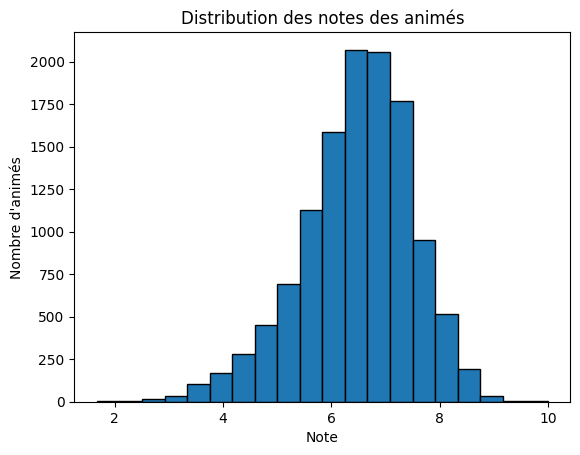

In [93]:
# Tracer l'histogramme de la variable "rating"
plt.hist(data_anime["rating"], bins=20, edgecolor="black")

# Ajouter un titre et des labels d'axes
plt.title("Distribution des notes des animés")
plt.xlabel("Note")
plt.ylabel("Nombre d'animés")

# Afficher le graphique
plt.show()

In [94]:
#Définir une variable égale au nombre de notes reçues par chaque anime. Etudier cette variable (paramètres statistiques et représentations graphiques)

# Compter le nombre de notes reçues par chaque anime
notes_par_anime = data_ratings.groupby('anime_id')['rating'].count()

# Afficher les paramètres statistiques de la variable
print(notes_par_anime.describe())

#On peut voir que la moyenne du nombre de notes reçues est de 155, la médiane est de 13, et l'écart-type est assez important (547). 
#La distribution est très asymétrique, avec beaucoup d'animés ayant très peu de notes et quelques-uns ayant beaucoup de notes.

count     9927.000000
mean       638.384305
std       1795.865541
min          1.000000
25%          9.000000
50%         57.000000
75%        395.000000
max      34226.000000
Name: rating, dtype: float64


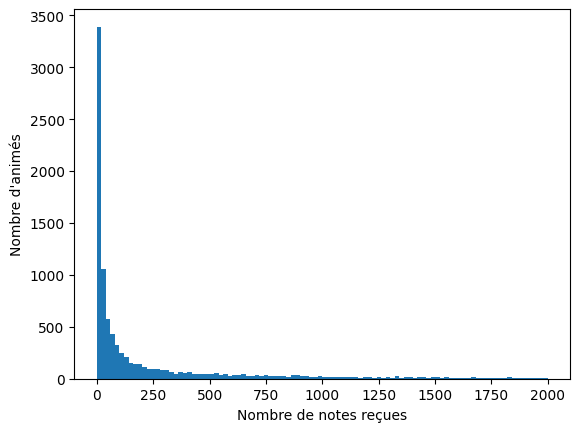

In [95]:
#Représentation graphique

plt.hist(notes_par_anime, bins=100, range=[0, 2000])
plt.xlabel('Nombre de notes reçues')
plt.ylabel('Nombre d\'animés')
plt.show()

#On peut voir que la majorité des animés ont très peu de notes, avec une forte diminution du nombre d'animés au-delà de 1000 notes

In [97]:
#Définir une variable égale au rang de chaque animé dans un classement basé sur le nombre de notes reçues. Quels sont les 50 animés les plus notés ?

# Comptage du nombre de notes pour chaque anime
notes_par_anime = data_ratings.groupby('anime_id')['rating'].count()

# Création d'une nouvelle colonne contenant le nombre de notes par anime
data_anime['nombre_de_notes'] = data_anime['anime_id'].map(notes_par_anime)

# Trier les anime par nombre de notes décroissant et récupérer les 50 premiers
anime_plus_notes = data_anime.sort_values('nombre_de_notes', ascending=False).head(50)

# Afficher les noms des 50 anime les plus notés et leur nombre de notes
print(anime_plus_notes[['name', 'nombre_de_notes']])

                                                   name  nombre_de_notes
40                                           Death Note          34226.0
804                                    Sword Art Online          26310.0
86                                   Shingeki no Kyojin          25290.0
19                      Code Geass: Hangyaku no Lelouch          24126.0
159                                        Angel Beats!          23565.0
760                                          Elfen Lied          23528.0
841                                              Naruto          22071.0
1                      Fullmetal Alchemist: Brotherhood          21494.0
200                                 Fullmetal Alchemist          21332.0
13                   Code Geass: Hangyaku no Lelouch R2          21124.0
131                                           Toradora!          20837.0
1709                             Highschool of the Dead          19488.0
15                        Sen to Chihiro no Kamikak

In [126]:
#Liste de tous les genres

# Séparation de la colonne "genre" en une liste de genres
genres_list = data_anime['genre'].str.split(',', expand=False)

# Création d'une liste unique de tous les genres présents dans le DataFrame
all_genres = set(genre for genres in genres_list for genre in genres)

# Affichage de la liste de tous les genres
print(list(all_genres))

[' Parody', ' Demons', 'Samurai', 'Space', ' Harem', 'Shounen', ' Yuri', ' Horror', 'Parody', 'School', 'Slice of Life', ' Drama', 'Adventure', ' Thriller', 'Martial Arts', 'Psychological', 'Mecha', ' Sci-Fi', ' Shounen Ai', 'Romance', ' Military', ' Shoujo Ai', ' Super Power', ' Kids', 'Ecchi', ' Psychological', ' Slice of Life', 'Military', 'Fantasy', 'Sports', 'Comedy', 'Josei', ' Magic', 'Police', 'Seinen', 'Kids', 'Magic', 'Historical', 'Sci-Fi', ' Supernatural', ' Mystery', 'Mystery', 'Yaoi', ' Shoujo', ' Historical', 'Supernatural', ' Romance', ' Dementia', 'Demons', 'Cars', ' Yaoi', 'Game', ' Ecchi', 'Thriller', ' Music', 'Action', 'Shoujo', ' Seinen', ' Comedy', ' Fantasy', ' Sports', 'Dementia', ' School', 'Vampire', ' Hentai', ' Cars', ' Adventure', 'Drama', ' Shounen', ' Space', ' Vampire', ' Game', 'Horror', ' Samurai', ' Josei', 'Music', ' Mecha', 'Hentai', ' Martial Arts', 'Super Power', 'Harem', ' Police']


In [112]:
#Définir une variable égale au nombre de notes reçues par chaque genre. Etudier cette variable (paramètres statistiques et représentations graphiques).

# Remplacer les valeurs manquantes par une chaîne vide
data_anime['genre'] = data_anime['genre'].fillna('')

# Diviser les genres
genres = data_anime['genre'].str.split(', ')

# Ajouter les genres séparés dans une nouvelle colonne 'split_genre'
data_anime['split_genre'] = genres

# Calculer la moyenne des notes de chaque genre
genre_ratings = {}
for i, row in data_anime.iterrows():
    for genre in row['split_genre']:
        if genre not in genre_ratings:
            genre_ratings[genre] = []
        genre_ratings[genre].append(row['rating'])

# Calculer la moyenne de chaque genre
for genre in genre_ratings:
    genre_ratings[genre] = sum(genre_ratings[genre]) / len(genre_ratings[genre])

# Trouver le genre le mieux noté
best_genre = max(genre_ratings, key=genre_ratings.get)
print('Le genre le mieux noté est:', best_genre)


Le genre le mieux noté est: Drama


In [121]:
#10 genres les mieux notés WIP
# Suppression des lignes avec des valeurs manquantes
data_anime.dropna(inplace=True)

# Séparation de la colonne "genre" en plusieurs colonnes et ajout au DataFrame
genres_data_anime = data_anime['genre'].str.split(',', expand=True)
anime_data_anime = pd.concat([data_anime, genres_data_anime], axis=1)

# Calcul de la note moyenne de chaque genre
genres_mean_ratings = {}
for genre in genres_data_anime.columns:
    genre_ratings = anime_data_anime.groupby(genre)['rating'].mean()
    if genre_ratings.index[0] is None:
        genre_mean_rating = 0
    else:
        genre_mean_rating = genre_ratings.max()
    genres_mean_ratings[genre] = genre_mean_rating

# Tri des genres par note moyenne et affichage des 10 meilleurs
sorted_genres = sorted(genres_mean_ratings.items(), key=lambda x: x[1], reverse=True)
for genre, rating in sorted_genres[:10]:
    print(f'{genre}: {rating:.2f}')

7: 8.50
1: 8.17
5: 7.98
6: 7.91
4: 7.73
8: 7.68
3: 7.67
9: 7.56
0: 7.37
2: 7.36
